In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/xccelerate/02MachineLearning/ML Project/Airline Passenger satisfaction.csv')

In [ ]:
df.head(5)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.shape

(129880, 24)

In [ ]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
len(df.id.unique())  #check if all IDs are unique and if the ID needs to be in trained set

129880

In [ ]:
df.satisfaction_v2.value_counts()

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64

In [ ]:
df.isna().sum()    #find out that there are 393 null values in the col. "Arrival Delay in Minutes"

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
temp = df[df["Arrival Delay in Minutes"].isna()]
temp.describe()     #compare the overall stat details of with the rows containing null-value in the col. "Arrival Delay in Minutes"

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,0.0
mean,59064.106870,39.162850,2113.229008,2.842239,3.111959,2.842239,3.005089,3.239186,3.295165,3.432570,3.450382,3.442748,3.414758,3.765903,3.366412,3.664122,3.366412,37.885496,NaN
std,38223.550326,15.707269,1094.182254,1.430551,1.537851,1.491659,1.324793,1.337753,1.377443,1.365074,1.302747,1.298510,1.339542,1.154476,1.268975,1.181991,1.329835,66.213936,NaN
min,247.000000,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,25319.000000,27.000000,1376.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,NaN
50%,50960.000000,39.000000,2026.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,8.000000,NaN
75%,96264.000000,51.000000,2690.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,48.000000,NaN
max,129489.000000,72.000000,5549.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,530.000000,NaN


In [ ]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# fill the NaN in Arrival Delay in Minutes with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(df[['Arrival Delay in Minutes']])

SimpleImputer()

In [ ]:
df[['Arrival Delay in Minutes']] = imputer.transform(df[['Arrival Delay in Minutes']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
obj_col = df.select_dtypes('object').columns

In [ ]:
# data preprocessing: Label Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for i in obj_col:
  df[i]= le.fit_transform(df[i]) 

df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,0,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,0,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,0,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,0,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,0,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.describe()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,0.547328,0.492616,0.183092,39.427957,0.309416,0.593864,1981.409055,2.838597,2.990645,...,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,0.497757,0.499947,0.386743,15.119360,0.462255,0.621378,1027.115606,1.392983,1.527224,...,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.407410
min,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1359.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,1.000000,0.000000,0.000000,40.000000,0.000000,1.000000,1925.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,1.000000,1.000000,0.000000,51.000000,1.000000,1.000000,2544.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,1.000000,1.000000,1.000000,85.000000,1.000000,2.000000,6951.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


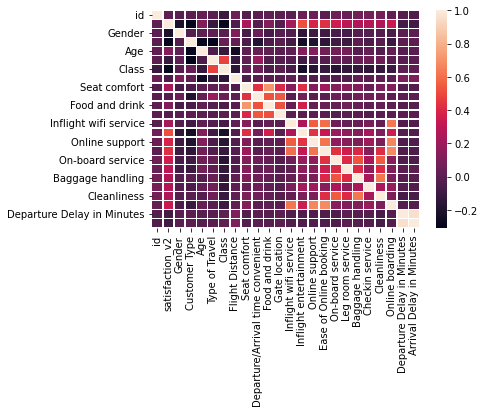

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=False,linewidths=0.5)

In [ ]:
# start feature scaling
# split df into X and y
X=df.iloc[:,2:].values
y=df.satisfaction_v2.values

In [ ]:
X

array([[  0.,   0.,  65., ...,   2.,   0.,   0.],
       [  1.,   0.,  47., ...,   2., 310., 305.],
       [  0.,   0.,  15., ...,   2.,   0.,   0.],
       ...,
       [  1.,   1.,  69., ...,   2., 155., 163.],
       [  1.,   1.,  66., ...,   2., 193., 205.],
       [  0.,   1.,  38., ...,   3., 185., 186.]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#Splitting the data into training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

#fit_transform for training, and transform for test --> We fit the training data for model building

In [ ]:
X_train

array([[0.        , 0.        , 0.5       , ..., 1.        , 0.02758621,
        0.03203125],
       [1.        , 0.        , 0.47435897, ..., 0.4       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25641026, ..., 0.8       , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.43589744, ..., 0.6       , 0.00229885,
        0.        ],
       [0.        , 0.        , 0.53846154, ..., 0.8       , 0.        ,
        0.        ],
       [0.        , 1.        , 0.19230769, ..., 0.8       , 0.        ,
        0.        ]])

In [ ]:
X_test

array([[1.        , 0.        , 0.53846154, ..., 0.4       , 0.00153257,
        0.        ],
       [1.        , 0.        , 0.51282051, ..., 0.6       , 0.01149425,
        0.00546875],
       [0.        , 0.        , 0.48717949, ..., 0.6       , 0.00536398,
        0.        ],
       ...,
       [1.        , 0.        , 0.29487179, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.43589744, ..., 0.8       , 0.03141762,
        0.02265625],
       [0.        , 0.        , 0.53846154, ..., 0.6       , 0.        ,
        0.        ]])

In [ ]:
# start trying different classifier models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
model_kNN = KNeighborsClassifier()
model_dt = DecisionTreeClassifier(criterion='entropy')
model_rf = RandomForestClassifier(n_estimators=200)
model_nb = GaussianNB()
model_sv = SVC()
model_lr = LogisticRegression()

model_list = [model_kNN,model_dt,model_rf,model_nb,model_sv,model_lr]

In [ ]:
# start trying ensemble learning

from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [ ]:
model_list

[KNeighborsClassifier(),
 DecisionTreeClassifier(criterion='entropy'),
 RandomForestClassifier(n_estimators=200),
 GaussianNB(),
 SVC(),
 LogisticRegression()]

In [ ]:
X

array([[  0.,   0.,  65., ...,   2.,   0.,   0.],
       [  1.,   0.,  47., ...,   2., 310., 305.],
       [  0.,   0.,  15., ...,   2.,   0.,   0.],
       ...,
       [  1.,   1.,  69., ...,   2., 155., 163.],
       [  1.,   1.,  66., ...,   2., 193., 205.],
       [  0.,   1.,  38., ...,   3., 185., 186.]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

seed = 7
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = LogisticRegression()
#estimators.append(('logistic', model1))
estimators.append(('cart', model_dt))
estimators.append(('svm', model_sv))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print("Accuracy for VotingClassifier:", results.mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy for AdaBoostClassifier:", round(results.mean()*100, 2))

Accuracy for AdaBoostClassifier: 85.81


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy for GradientBoostingClassifier:", results.mean())

Accuracy for GradientBoostingClassifier: 0.9086541422851863


In [ ]:
import xgboost as xgb

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = xgb.XGBClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy for XGBoost:", results.mean()) 

In [ ]:
from sklearn.ensemble import BaggingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy for BaggingClassifier:", round(results.mean()*100, 2))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = ExtraTreesClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy for ExtraTreesClassifier:", round(results.mean()*100, 2))

# Hyper Parameter Optimization

In [ ]:
# Randomized Search

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
                                                                                # n_iter >> no. of candidates; cv >> no. of folds
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}.'.format(accuracy))
    return accuracy

In [ ]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
best_random = rf_random.best_estimator_
print(best_random)
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf_gd = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gd, param_grid = param_grid,
                           cv = 2, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
print(best_grid)
grid_accuracy = evaluate(best_grid, X_train, y_train)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))